**Expression:** 

$Pr(x^*|x_1..x_n) = \int Pr(x^*|\theta)Pr(\theta|x_1..x_n)d\theta$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [8]:
# Prepare data
original_mu = 5
original_sig = 8
I = 5 # data points --> Change this value to recognize
r = original_mu + original_sig * np.random.randn(I,1)

In [9]:
# Maximum of a likelihood
def mleNorm(x):
    I = x.size;
    mu = sum(x) / I;
    var = sum(pow(x - mu, 2)) / I;
    return mu, var

# Maximum of a posterior
def mapNorm(x, alpha, beta, gamma, delta):
    I = x.size;
    mu = (sum(x) + gamma*delta) / (I + gamma);
    var_up = sum(pow(x - mu,2)) + 2*beta + gamma*pow(delta-mu,2);
    var_down = I + 3 + 2*alpha;
    var = var_up / var_down;
    return mu, var

# Bayes' approach
def evidentNorm(alpha, beta, gamma, delta, x, x_test):
    I = x.size
    alpha_ = alpha + I / 2
    beta_ = sum(pow(x,2))/2+beta + gamma*pow(delta,2)/2 - pow(gamma*delta+sum(x),2) / (2*(gamma+I))
    gamma_ = gamma + I
    delta_ = (gamma*delta + sum(x))/(gamma+I)
    
    alphaPost = alpha_ + 1/2
    betaPost = pow(x_test,2)/2+ beta_ + gamma_*pow(delta_,2)/2 - pow(gamma_*delta_+x_test,2) / (2*(gamma_+1))
    gammaPost = gamma_ + 1
    deltaPost = (gamma_*delta_ + x_test)/(gamma_+1)
    
    upVal = math.sqrt(gamma_) * pow(beta_,alpha_) * math.gamma(alphaPost)
    lowVal = math.sqrt(2*math.pi) * math.sqrt(gammaPost) * pow(betaPost,alphaPost) * math.gamma(alpha_)
    k = upVal / lowVal
    return k

In [10]:
estimated_mu, estimated_var = mleNorm(r)
estimated_sig = np.sqrt(estimated_var)

# MAP Error value
map_mu, map_sig = mapNorm(r,1,1,1,0)
map_sig = np.sqrt(map_sig)
print('Error value MAP: ', map_mu, map_sig)

# MLE Error value
muError = abs(original_mu - estimated_mu)
sigError = abs(original_sig - estimated_sig)
print('Error value: ', muError,sigError)


Error value MAP:  [3.07700824] [6.99414991]
Error value:  [1.30759011] [1.75520121]


In [11]:
# Normalize distribution
x = np.linspace(-20,30,100)
original = stats.norm.pdf(x, original_mu, original_sig)
map_estimated = stats.norm.pdf(x, map_mu, map_sig)
mle_estimated = stats.norm.pdf(x, estimated_mu, estimated_sig)
bayes_estimated = evidentNorm(1,1,1,0,r,x)

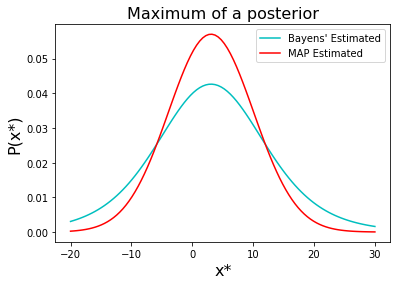

In [20]:
plt.plot(x, bayes_estimated, color = 'c', label = "Bayens' Estimated")
plt.plot(x, map_estimated, color = 'r', label = 'MAP Estimated')
#plt.plot(x, mle_estimated, color ='b', label = 'ML Estimated')
#plt.plot(x, original, color ='g', label = 'Original')
plt.xlabel('x*', size = 16)
plt.ylabel('P(x*)', size = 16)
plt.title('Maximum of a posterior', size = 16)
plt.legend()
plt.show()